Recursos utilizados

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import math

Escolhemos quaisquer duas massas com ordem de grandeza significativa para o problema. Na realidade, como a origem do sistema se encontrará no centro de massa, conforme proposto por Lagrange, é possível que um dos corpos possua massa praticamente negligenciável em relação ao outro. Nesse caso, a origem do sistema estará no centro do corpo de maior massa, e os pontos poderão ser calculados normalmente. 

Algumas sugestões:

*   Massa do Sol: 1.989E30
*   Massa da Terra: 5.972E24
*   Massa da Lua: 7.35E22
*   Massa de Júpiter: 1.898E27




In [ ]:
# m1 representa a massa do corpo 1 e m2 a massa do corpo 2
m1 = float(input("Massa 1:"))
m2 = float(input("Massa 2:"))

Massa 1:1E30
Massa 2:3E27


A utilização das coordenadas adimensionais tem o intuito de obter soluções puramente numéricas para o problema em questão, que envolve grandezas físicas. Assim, é possível simplificar o problema e realizar diversas manipulações númericas com o problema sem precisar levar em conta as suas dimensões. A maneira mais simples de se criar uma grandeza adimensional é através da razão entre grandezas de mesma dimensão. 

O uso do recurso if/else abaixo ajusta a massa adimensional para manter a numeração correta dos pontos colineares de Lagrange.

In [ ]:
#m_adi representa a massa adimensional dos corpos

if m1 > m2:
  m_adi = m2/(m1 + m2)
else:
  m_adi = m1/(m1 + m2)
#if m_adi > 1:
  #while m_adi > 1:
    #m_adi = m_adi/10
#if m_adi <0.001:
  #while m_adi<0.001:
    #m_adi = m_adi*10


Agora definiremos os pontos a direita e a esquerda da origem do sistema, seguindo o mesmo eixo referência, para determinar os pontos colineares de Lagrange:

In [ ]:

def coord(massa,n):
  x1 = (-massa) * np.cos(np.linspace(0, np.pi, n))
  x2 = (1-massa) * np.cos(np.linspace(0,np.pi,n))
  y1 = (-massa) * np.sin(np.linspace(0, np.pi, n))
  y2 = (1 - massa) * np.sin(np.linspace(0, np.pi, n))

  return x1,x2,y1,y2

x1,x2,y1,y2 = coord(m_adi, 500)

Finalmente, é possível definir uma função para encontrar os pontos colineares. Em seguida, o método de Newton-Raphson para encontrar 0 de funções será utilizado, então é preciso definir também um passo df para a função.

A fórmula utilizada para encontrar os pontos colineares na forma adimensional é a proposta por Rubinsztejn(2018):
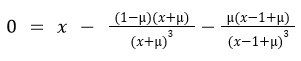


In [ ]:
#Agora defimos a função para determinar os pontos lineares, utilizando a massa adimensional para facilitar a conta.

def f(x,m_adi):
  parte1 = x #valor inicial adimensional
  parte2 = ((1 - m_adi) * (x + m_adi)/ np.abs(x + m_adi))**3
  parte3 = (m_adi* (x - 1 + m_adi)) / np.abs(x - 1 + m_adi)**3
  eq =parte1-parte2-parte3
  return(eq)


def df(x):
    h = 0.0001
    return((f(x + h,m_adi) - f(x,m_adi))/h)
    

In [ ]:
#Definição do método Newton Raphson:

xi = [0,1,-1]
tol = 0.000001
ni = 100
x = 0
pontos_lineares = []
for j in xi:
  x0 = j
  i = 1
  while i > ni or math.fabs(f(x0,m_adi))>tol:
    x = x0-f(x0,m_adi)/df(x0)
    x0 = x
    i += 1
    if i >= ni:
      print("Raiz não encontrada")
      break
  pontos_lineares.append(x0)

# Uma vez encontradas as posições em x dos pontos lineares, atribuimos os valores encontrados
# às suas devidas variaveis:

L1 = 0
L2 = 0
L3 = 0

def LinP(pontos_lineares):
  for i in range(0, len(pontos_lineares)):
    if i == 0:
      L1 = pontos_lineares[i]
    elif i==1:
      L2 = pontos_lineares[i]
    else:
      L3= pontos_lineares[i]
  return L1, L2, L3

L1,L2,L3 = LinP(pontos_lineares)


Para obter os pontos L4 e L5 foram utilizadas as coordenadas vetoriais demonstradas por Comish(1998):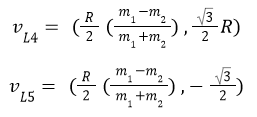

Em que R é a distância entre os corpos e m1-m2/m1+m2 representa a massa adimensional. Essas coordenadas geram a posição dos 2 triângulos equiláteros que definem L4 e L5. Para fim de vizualização gráfica, definimos R = 1 de forma adimensional, ou seja, os pontos são gerados em torno de um círculo unitário.

In [ ]:
def trigP(massa, R=1):
  L4 = (R/2 * m_adi, R*(np.sqrt(3)/2))
  L5 = (R/2 * m_adi, R*(-np.sqrt(3)/2))

  return L4, L5
L4, L5 = trigP (m_adi)

In [ ]:
#os 5 pontos de Lagrange
(L1,0),(L2,0),(L3,0),L4,L5

((0.8509152855144309, 0),
 (1.13913201269722, 0),
 (-0.991809881764532, 0),
 (0.0014955134596211365, 0.8660254037844386),
 (0.0014955134596211365, -0.8660254037844386))

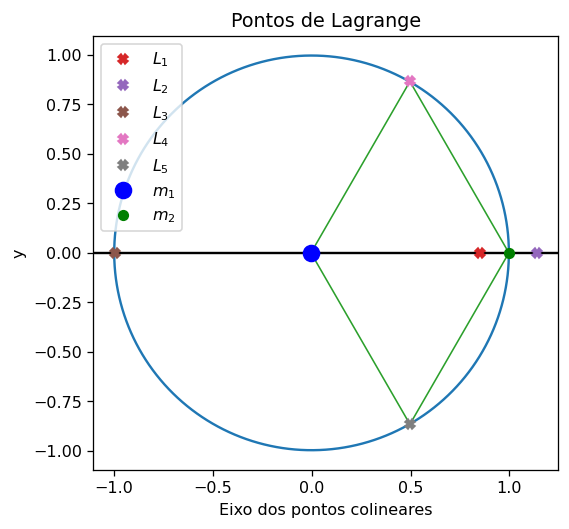

In [ ]:
fig, ax = plt.subplots(figsize=(7,5), dpi=115)
ax.set_xlabel('Eixo dos pontos colineares')
ax.set_ylabel('y')
ax.axhline(0, color='k') #linha horizontal no eixo x 

# Plotando as orbitas e o losango que é formado pelas massas e ponto L4 e L5
####a função np.hstack gera uma lista unidimensional com as matrizes

ax.plot(np.hstack((x2, x2[::-1])), np.hstack((y2, -y2[::-1])))
ax.plot(np.hstack((x1, x1[::-1])), np.hstack((y1, -y1[::-1])))
ax.plot([-m_adi, 0.5 - m_adi, 1 - m_adi, 0.5 - m_adi, -m_adi], [0, np.sqrt(3)/2, 0, -np.sqrt(3)/2, 0], ls="-", lw=1)

# Plotando os pontos

ax.plot(L1, 0, 'X', label="$L_1$")
ax.plot(L2, 0, 'X', label="$L_2$")
ax.plot(L3, 0, 'X', label="$L_3$")
ax.plot(0.5 - m_adi, np.sqrt(3)/2, 'X', label="$L_4$")
ax.plot(0.5 - m_adi, -np.sqrt(3)/2, 'X', label="$L_5$")
ax.plot(-m_adi, 0, 'bo', label="$m_1$", ms=10) #massa maior
ax.plot(1 - m_adi, 0, 'go', label="$m_2$") #massa menor
ax.legend(loc='upper left')
plt.title('Pontos de Lagrange')
ax.set_aspect("equal")

REFERÊNCIAS 


    COMISH, Neil J. The Lagrange Points. 1998. Disponível em: <https://map.gsfc.nasa.gov/ContentMedia/lagrange.pdf >. Acesso em: 12 de out de 2022.

    ILLINOIS FACULTY OF MATH. Nondimensionalization, Scaling and Units. 2012. Disponível em: <https://faculty.math.illinois.edu/~rdeville/teaching/558/nondimensionalization.pdf>. Acesso em: 12 de out de 2022.

    KLIONER, Sergei. Celestial mechanics of the N-body problem. In: ALTENA, William F. V.. Astrometry for Astrophysics. Cambridge: Cambridge University Press, 2013. p.(69-92).

    ROY, Archie Edmiston. Orbital Motion. Bristol: IOP Publishing, 1988.

    RUBINSZTEJN, A. An Introduction to Lagrange Points - The 3-Body Problem. Gereshes. 2018. Disponível em: <https://gereshes.com/2018/12/03/an-introduction-to-lagrange-points-the-3-body-problem/>. Acesso em: 13 de out de 2022.
